### 1) Load the data from preprocessed file

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cardio_processed.csv')
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,52,1,168,76.0,120,80,1,1,1,0,1,0,26.927438
69819,61,0,158,126.0,140,90,2,2,0,0,1,1,50.472681
69820,52,1,183,105.0,180,90,3,1,0,1,0,1,31.353579
69821,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [3]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df[(df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)]

df2

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69817,57,0,165,80.0,150,80,1,1,0,0,1,1,29.384757
69818,52,1,168,76.0,120,80,1,1,1,0,1,0,26.927438
69820,52,1,183,105.0,180,90,3,1,0,1,0,1,31.353579
69821,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'After Outlier remove')

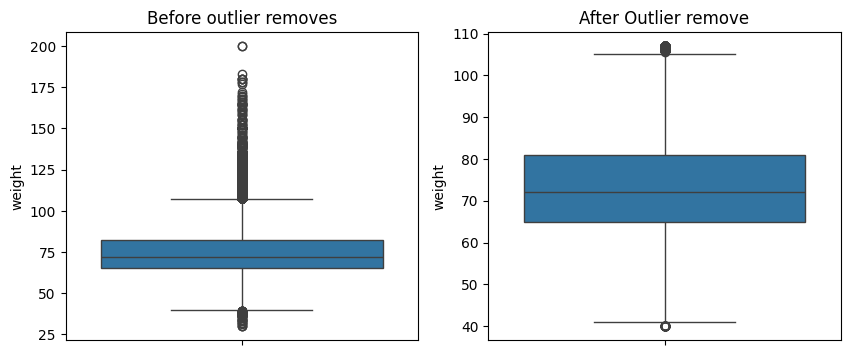

In [5]:
plt.figure(figsize=(10 , 4))

plt.subplot(1 , 2 , 1)
sns.boxplot(y=df['weight'])
plt.title("Before outlier removes")

plt.subplot(1 , 2 , 2)
sns.boxplot(y=df2['weight'])
plt.title("After Outlier remove")


In [6]:
df = df2.copy()
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69817,57,0,165,80.0,150,80,1,1,0,0,1,1,29.384757
69818,52,1,168,76.0,120,80,1,1,1,0,1,0,26.927438
69820,52,1,183,105.0,180,90,3,1,0,1,0,1,31.353579
69821,61,0,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [7]:
x = df.drop(columns=['cardio'])
y = df['cardio']

### 2) import train_text_split and split the data in train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [10]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
979,55,0,166,67.0,120,80,1,1,0,0,1,24.314124
45646,61,1,160,60.0,120,80,1,1,0,0,1,23.437500
45339,64,0,150,73.0,140,80,3,3,0,0,0,32.444444
13923,56,0,163,72.0,120,80,1,1,0,0,1,27.099251
42825,57,1,172,71.0,180,100,3,3,0,0,1,23.999459
...,...,...,...,...,...,...,...,...,...,...,...,...
38163,60,1,168,70.0,120,80,1,1,0,0,1,24.801587
6429,50,1,164,64.0,150,100,1,1,0,0,0,23.795360
56326,41,1,174,68.2,120,80,1,1,1,0,1,22.526093
885,41,1,170,65.0,120,80,1,1,1,1,1,22.491349


In [11]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
46345,58,1,166,85.0,120,80,1,1,0,0,1,30.846277
45876,61,0,158,56.0,130,95,1,1,0,0,1,22.432303
55926,58,1,162,70.0,120,80,1,1,0,0,1,26.672763
61369,53,0,158,66.0,130,70,1,1,0,0,1,26.438071
6460,41,1,165,81.0,130,80,1,1,0,0,1,29.752066
...,...,...,...,...,...,...,...,...,...,...,...,...
47464,50,1,175,72.0,120,80,1,1,0,0,1,23.510204
608,50,0,167,67.0,100,60,2,1,0,0,1,24.023809
26447,56,1,170,74.0,110,70,3,1,0,0,1,25.605536
7718,56,0,155,80.0,120,90,2,2,0,0,0,33.298647


In [12]:
y_train

979      1
45646    1
45339    1
13923    0
42825    1
        ..
38163    0
6429     1
56326    0
885      0
16191    0
Name: cardio, Length: 54420, dtype: int64

In [13]:
y_test

46345    1
45876    1
55926    0
61369    1
6460     0
        ..
47464    0
608      0
26447    0
7718     1
45956    1
Name: cardio, Length: 13605, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_train_scaled

array([[ 0.31928642, -0.72802953,  0.2172957 , ..., -0.23630057,
         0.49402057, -0.60242312],
       [ 1.2042823 ,  1.37357066, -0.54663285, ..., -0.23630057,
         0.49402057, -0.7895834 ],
       [ 1.64678024, -0.72802953, -1.8198471 , ..., -0.23630057,
        -2.02420719,  1.13341017],
       ...,
       [-1.74570398,  1.37357066,  1.2358671 , ..., -0.23630057,
         0.49402057, -0.98416984],
       [-1.74570398,  1.37357066,  0.7265814 , ...,  4.23189846,
         0.49402057, -0.99158768],
       [ 0.61428504, -0.72802953, -1.18323998, ..., -0.23630057,
         0.49402057,  0.51598707]], shape=(54420, 12))

In [16]:
x_test_scaled

array([[ 0.76178436,  1.37357066,  0.2172957 , ..., -0.23630057,
         0.49402057,  0.79219941],
       [ 1.2042823 , -0.72802953, -0.8012757 , ..., -0.23630057,
         0.49402057, -1.00419428],
       [ 0.76178436,  1.37357066, -0.29199   , ..., -0.23630057,
         0.49402057, -0.09885076],
       ...,
       [ 0.46678573,  1.37357066,  0.7265814 , ..., -0.23630057,
         0.49402057, -0.32670501],
       [ 0.46678573, -0.72802953, -1.18323998, ..., -0.23630057,
        -2.02420719,  1.3157835 ],
       [ 0.46678573, -0.72802953, -0.8012757 , ..., -0.23630057,
         0.49402057, -0.91867064]], shape=(13605, 12))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# We use logistic regression because output is categorical and it gives me answer in 0 or 1

# Logical regression learn using gradient descent 
# Each iteration improves the weight and default is 100
# It tries up 1000 times to find the best weights

# This is a linear model and it learns weight for each feature that's why gradient descent is used to minimize loss
# We need scaling in this because of different ranges of each feature like height , weight are in different ranges that's why
# All features with same scale can give us best learning linear model 

logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(x_train_scaled , y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
# param_grid = {
#     'C' : [0.01 , 0.1 , 1 , 10],
#     'penalty' : ['l1' , 'l2'],  l1 = Removes weak features , l2 = reduces weights of weak features
#     'solver' : ['liblinear'] It is stable
# }

# grid = GridSearchCV(
#     estimator=logisticRegression,
#     param_grid=param_grid,
#     cv=5,   Your training data is split into 5 parts
#     scoring='accuracy',  Metric used to select the best model
#     n_jobs=-1   For faster training
# )

# grid.fit(x_train_scaled , y_train)

# print("Best Parameters:", grid.best_params_)
# print("CV Accuracy:", grid.best_score_)

# best_model = grid.best_estimator_

# y_pred = best_model.predict(X_test_scaled)

# from sklearn.metrics import accuracy_score, classification_report

# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [18]:
y_prediction = logisticRegression.predict(x_test_scaled)
y_prediction

array([0, 1, 0, ..., 0, 1, 0], shape=(13605,))

In [19]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

print(confusion_matrix(y_test , y_prediction))

# [[TN  FP]
#  [FN  TP]]


[[5460 1476]
 [2231 4438]]


In [20]:
print(classification_report(y_test , y_prediction))

# Precision
# The model predict the heart decease, It is correct 75% = 0.75
# When model predicts no disease, it is correct 71% of the time

# Recall 
# Model correctly found 79% of healthy people
# Model correctly found only 67% of diseased people

# f1-score
# F1 = 2 × (Precision × Recall) / (Precision + Recall)

# Model gives us accuracy of 73% 
# It is not bad it is acceptable and descent 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6936
           1       0.75      0.67      0.71      6669

    accuracy                           0.73     13605
   macro avg       0.73      0.73      0.73     13605
weighted avg       0.73      0.73      0.73     13605



In [ ]:
print("Accuracy : ",accuracy_score(y_test , y_prediction))

Accuracy :  0.7275266446159501


In [30]:
import joblib
joblib.dump(logisticRegression , 'logistic_model.pkl')
joblib.dump(scaler , 'scaler.pkl')

['scaler.pkl']

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200 , random_state=42)

# In this we doesn't need to use scaled data instead of that we give actual data 
# Because it is tree based model and makes decision like if condition
# And these tree used thresold instead of distance that's why we don't need gradient descent , weight updates and scalling

rf.fit(x_train , y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [23]:
y_pred_rf = rf.predict(x_test)

In [24]:
rf_confusion_matrix = confusion_matrix(y_test , y_pred_rf)
print(rf_confusion_matrix)

[[5036 1900]
 [2034 4635]]


In [25]:
print(classification_report(y_test , y_prediction))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6936
           1       0.75      0.67      0.71      6669

    accuracy                           0.73     13605
   macro avg       0.73      0.73      0.73     13605
weighted avg       0.73      0.73      0.73     13605



In [26]:
print("Accuracy : ",accuracy_score(y_test , y_pred_rf))

Accuracy :  0.7108416023520765


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42 , max_depth=10)

dt.fit(x_train , y_train)

y_predict = dt.predict(x_test)

print(confusion_matrix(y_test , y_predict))

[[5383 1553]
 [2196 4473]]


In [28]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6936
           1       0.74      0.67      0.70      6669

    accuracy                           0.72     13605
   macro avg       0.73      0.72      0.72     13605
weighted avg       0.73      0.72      0.72     13605



In [29]:
print("Accuracy : ",accuracy_score(y_test , y_predict))

Accuracy :  0.7244395442851893
